# A simple notebook which analyses the Songs we have been listening on Alexa since January 2019 to October 2019

#Load the csv 

In [64]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [65]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import calendar
from pandas.plotting import register_matplotlib_converters
import glob
from datetime import date
from datetime import timedelta


register_matplotlib_converters()

path = r'/home/pi/songs_analysis' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,parse_dates=[0],usecols=[0,1,2,3],names=['date','artist','title','album'],skip_blank_lines=True,)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
#data.head()



#data = pd.read_csv("consolidated.csv",nrows=5285,parse_dates=[0],usecols=[0,1,2,3],names=['date','artist','title','album'],skip_blank_lines=True,)
#data = pd.read_csv("face_data-jul18.csv",parse_dates=[1],index_col=[1])
#data.dropna(how="all", inplace=True) 
# Add day of the week 
data["day_of_the_week"] = data["date"].dt.day_name()
data["month_of_the_year"] = data["date"].dt.month_name()
data["week_of_the_year"] = data["date"].dt.week
data["day_of_the_week_no"] = data["date"].dt.day
data["month_of_the_year_no"] = data["date"].dt.month
data["hour_of_the_day"] = data["date"].dt.hour





# Filter on dates if needed
new_date=pd.datetime.now()
#new_date=pd.to_datetime('01-August-2019')
older_date = new_date - timedelta(2)
mask = (data['date'] > older_date) & (data['date'] <= new_date)
#data=data.loc[mask]


# Removing the songs which are played daily.
data = data[data.title != "4AM Hanuman Chalisa"]
data = data[data.title != "Gayatri Mantra"]


# Preview the first 5 lines of the loaded data 
#data.head()

In [66]:
# Total no of Songs Played till date
print ("Total No of Songs Played: "+str(data['title'].count()))

# Total no of Unique songe
print ("Total No of Unique Songs Played: "+str(data['title'].nunique()))
print ("Total No of Unique Albums Played: "+str(data['album'].nunique()))
print ("Total No of Unique Artists Played: "+str(data['artist'].nunique()))

Total No of Songs Played: 5002
Total No of Unique Songs Played: 1029
Total No of Unique Albums Played: 686
Total No of Unique Artists Played: 766


In [67]:
# Build the word Cloud for the Artists

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.artist.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [68]:
# Build the word Cloud for the Title

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.title.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [69]:
# Build the word Cloud for the Album

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.album.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

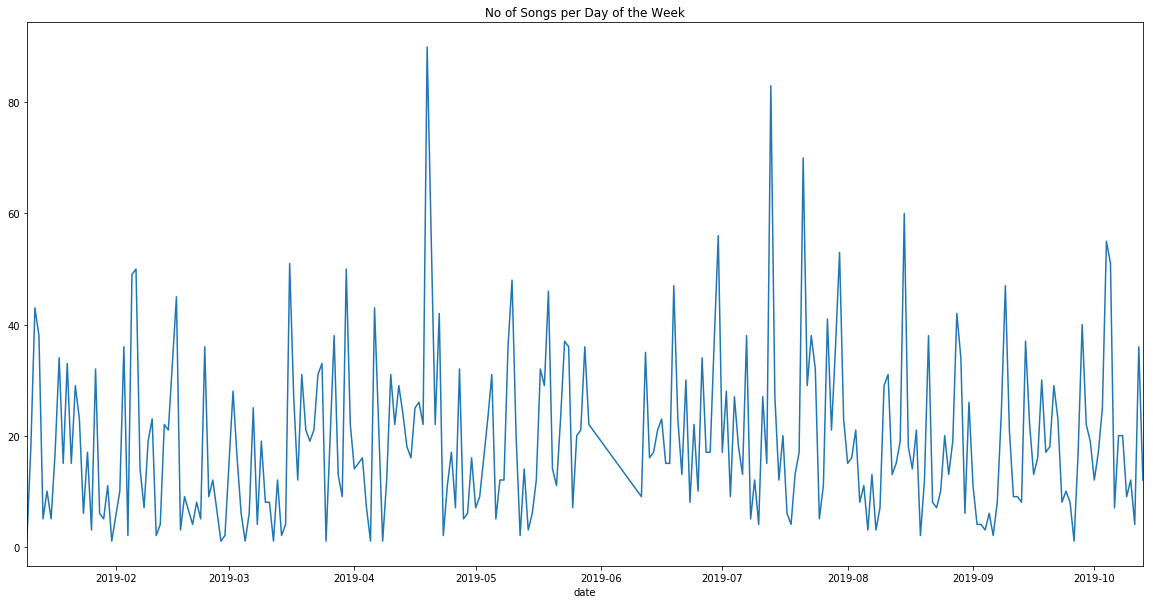

In [70]:
# Print the usage of songs on a daily time series
data.sort_values(by="date").groupby(data["date"].dt.date)['title'].count().plot(title="No of Songs per Day of the Week",figsize=(20,10))


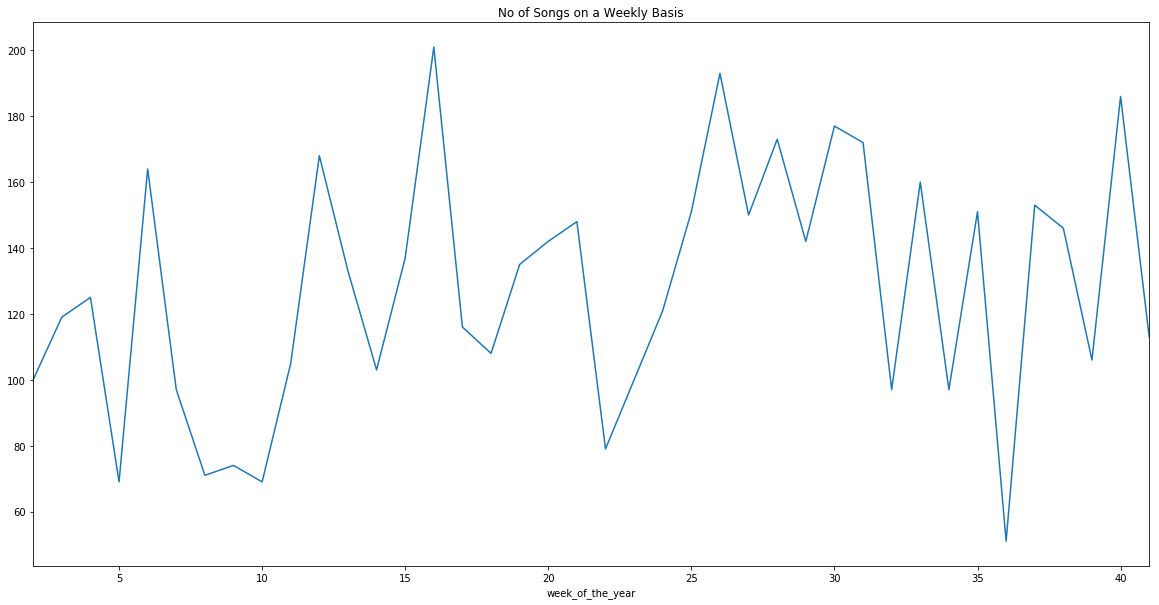

In [71]:
# Print the usage of songs on a Weekly  time series
data.sort_values(by="date").groupby(data["week_of_the_year"])['title'].count().plot(title="No of Songs on a Weekly Basis",figsize=(20,10))


In [72]:
# Print the usage of songs on a Monthly  time series
#data.sort_values(by="date").groupby(data["month_of_the_year"])['title'].count().plot(title="No of Songs on a Monthly Basis",figsize=(20,10))
data.sort_values(by="date").groupby(data["month_of_the_year"])['title'].count()

month_of_the_year
April        579
August       554
February     393
January      367
July         754
June         465
March        534
May          590
October      280
September    486
Name: title, dtype: int64

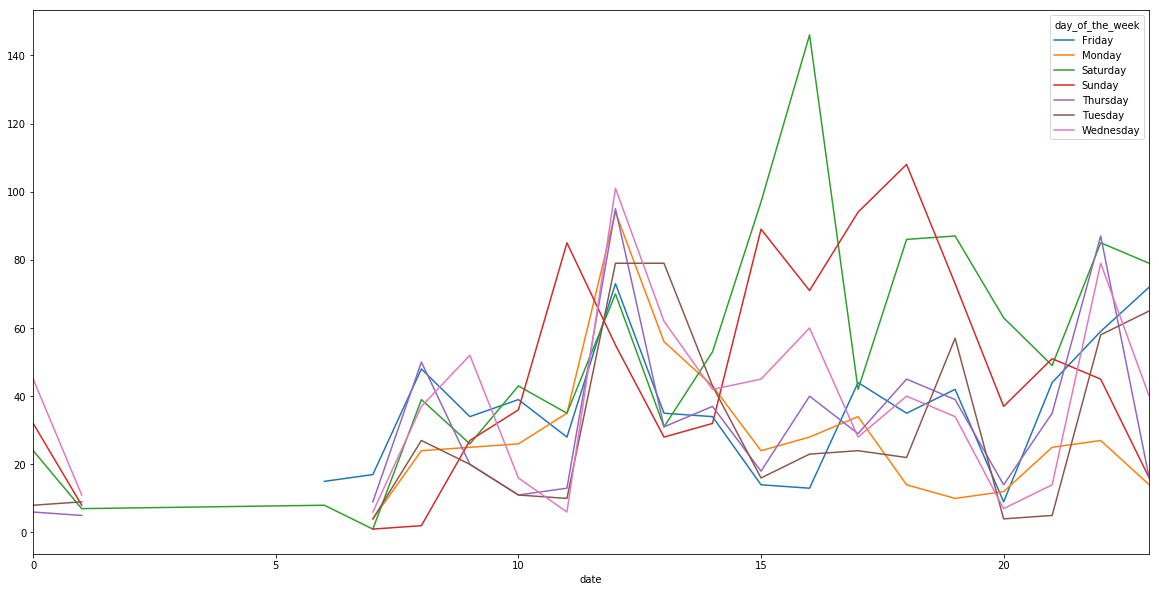

In [73]:
# Number of songs played in day per week
#print (data.groupby([data['date'].dt.hour, 'day_of_the_week'])['title'].count().unstack())

data.groupby([data['date'].dt.hour,'day_of_the_week'])['title'].count().unstack().plot(figsize=(20,10))


In [74]:
#data.groupby(data["date"].dt.month_name())['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per Day of the Week",figsize=(20,10))
data.groupby(data["date"].dt.month_name())['title'].count().sort_values(ascending=False)

date
July         754
May          590
April        579
August       554
March        534
September    486
June         465
February     393
January      367
October      280
Name: title, dtype: int64

# Total no of songs in day of the week

In [75]:
#data.groupby(data["date"].dt.day_name())['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per Day of the Week",figsize=(20,10))

data.groupby(data["date"].dt.day_name())['title'].count().sort_values(ascending=False)

date
Saturday     1071
Sunday        890
Wednesday     725
Friday        655
Thursday      600
Tuesday       564
Monday        497
Name: title, dtype: int64

# Total no of songs in hour of day 

In [76]:
#data.groupby(data["date"].dt.hour)['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per hour of the day ",figsize=(20,10))
data.groupby(data["date"].dt.hour)['title'].count().sort_values(ascending=False)

date
12    567
22    440
16    381
18    350
19    342
13    322
15    303
23    302
17    295
14    284
8     227
21    223
11    212
9     204
10    182
20    146
0     117
7      42
1      40
6      23
Name: title, dtype: int64

# Top 10 Songs IN a day

In [77]:
# Top 10 Songs at a monthly level
grouped = data.groupby('day_of_the_week')
for name,group in grouped:
    plt.figure()
    #group['title'].value_counts()[:10].plot(kind="bar",title="Top 10 popular Songs of "+name,figsize=(20,10))
    print ("\n Day of the Week ---- "+name)
    print (group['title'].value_counts()[:10])

plt.show()



 Day of the Week ---- Friday
Taki Taki [feat. Selena Gomez & Ozuna & Cardi B] [Explicit]    14
Naina Da Kya Kasoor                                            13
One Jump Ahead                                                 13
I Don’t Wanna Live Forever (Fifty Shades Darker)               11
Believer                                                       10
Afreen Afreen (Coke Studio Season 9)                           10
Namo Namo                                                      10
A Whole New World (End Title)                                  10
Ek Ladki Ko Dekha Toh Aisa Laga - Title Track                  10
For You My Love (O Bandeya)                                    10
Name: title, dtype: int64

 Day of the Week ---- Monday
Taki Taki [feat. Selena Gomez & Ozuna & Cardi B] [Explicit]    15
Afreen Afreen (Coke Studio Season 9)                           15
Daryaa                                                         13
Halka Halka (Unplugged)                                 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Top 10 Songs of All Time

In [78]:
# Print Top 20 Titles songs
#pd.Series(data['title']).value_counts().plot('bar')
#data['title'].value_counts()[:10].plot(kind="bar",title="Top 20 popular Songs of All Time",figsize=(20,10))

data['title'].value_counts()[:10]

A Whole New World (End Title)                                  100
Taki Taki [feat. Selena Gomez & Ozuna & Cardi B] [Explicit]     98
Afreen Afreen (Coke Studio Season 9)                            85
End Game [feat. Ed Sheeran & Future]                            83
Look What You Made Me Do                                        78
One Jump Ahead                                                  75
Speechless (Full)                                               73
I Don’t Wanna Live Forever (Fifty Shades Darker)                71
Arabian Nights (2019)                                           60
Mi Gente                                                        60
Name: title, dtype: int64

# Top 10 Songs per Month

In [79]:
# Top 10 Songs at a monthly level
grouped = data.groupby('month_of_the_year')
for name,group in grouped:
    plt.figure()
    #group['title'].value_counts()[:10].plot(kind="bar",title="Top 10 popular Songs of "+name,figsize=(20,10))
    print ("---"+name+"---")
    print (group['title'].value_counts()[:10])
    print ("\n")

plt.show()



---April---
I Don’t Wanna Live Forever (Fifty Shades Darker)    27
Mi Gente                                            25
Coca Cola Tu (feat. Young Desi)                     17
Ek Ladki Ko Dekha Toh Aisa Laga - Title Track       17
Namo Namo                                           13
Look What You Made Me Do                            11
Afreen Afreen (Coke Studio Season 9)                 9
Qaafirana                                            8
Bad Blood                                            8
Delicate                                             8
Name: title, dtype: int64


---August---
On My Way [Explicit]                                                      19
Kashi Vishwanath Gange                                                    19
Despacito                                                                 17
Safe & Sound (from The Hunger Games Soundtrack) [feat. The Civil Wars]    17
I Don’t Wanna Live Forever (Fifty Shades Darker)                          15
Aaj Jaane Ki

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Top 20 Popular Artists

In [80]:
# data['artist'].value_counts()[:20].plot(kind="bar",title="Top 20 popular Artists",figsize=(20,10))
data['artist'].value_counts()[:20]



Taylor Swift                               329
Amit Trivedi                               131
Will Smith                                 114
Rahat Fateh Ali Khan & Momina Mustehsan     85
ZAYN                                        84
A. R. Rahman                                78
Mena Massoud                                75
Taylor Swift (feat. Ed Sheeran, Future)     75
Naomi Scott                                 73
Ranveer Singh                               72
ZAYN & Taylor Swift                         71
Hans Zimmer                                 71
J Balvin & Willy William                    60
Krishna Das                                 50
DJ Snake (feat. Selena Gomez & Ozuna)       49
Ever After High                             47
Imagine Dragons                             46
Ed Sheeran                                  44
Adele                                       43
Shankar-Ehsaan-Loy & Diljit Dosanjh         42
Name: artist, dtype: int64



# Top 20 Popular Albums


In [81]:
#data['album'].value_counts()[:20].plot(kind="bar",title="Top 20 popular Albums",figsize=(20,10))

data['album'].value_counts()[:20]

Aladdin (Original Motion Picture Soundtrack)                       362
reputation                                                         214
Gully Boy                                                          178
The Lion King (Original Motion Picture Soundtrack)                 166
Kedarnath                                                          155
1989                                                               117
Taki Taki [Explicit]                                                98
Afreen Afreen (Coke Studio Season 9)                                85
Smallfoot (Original Motion Picture Soundtrack) [Deluxe Edition]     81
Manmarziyaan (Original Motion Picture Soundtrack)                   74
Andhadhun                                                           73
Fifty Shades Darker (Original Motion Picture Soundtrack)            71
Mi Gente                                                            60
Red (Deluxe Edition)                                                59
Soorma

# Most popular dates for Songs

In [82]:
#data['date'].dt.date.value_counts()[:20].plot(kind="bar",title="Top 20 popular Dates",figsize=(20,10))
data['date'].dt.date.value_counts()[:20]


2019-04-19    90
2019-07-13    83
2019-07-21    70
2019-08-15    60
2019-06-30    56
2019-10-04    55
2019-07-30    53
2019-10-05    51
2019-03-16    51
2019-03-30    50
2019-02-06    50
2019-02-05    49
2019-05-10    48
2019-09-09    47
2019-06-19    47
2019-05-19    46
2019-02-16    45
2019-04-06    43
2019-01-12    43
2019-08-28    42
Name: date, dtype: int64

# Top 10 Songs for last 4 weeks

In [83]:
#grouped = data.groupby(['month_of_the_year','title'])['title'].sum()
#grouped['month_of_the_year'].dt.date.value_counts()[:20].plot(kind="bar",title="Top 20 popular Dates",figsize=(20,10))
# Top 10 Songs at a weekly level for last 4 weeks
grouped = data.groupby('week_of_the_year')
size = grouped.ngroups
ind = 0 
for name,group in grouped:
    ind = ind + 1
    if size -4 < ind :
        plt.figure()
        #group['title'].value_counts()[:10].plot(kind="bar",title="Top 10 popular Songs of Week "+str(name),figsize=(20,10))
        print ("Week: "+str(name))
        print (group['title'].value_counts()[:10])
        print ("\n")
plt.show()



Week: 38
Hosanna                          25
For You My Love (O Bandeya)      14
Look What You Made Me Do          8
Havana                            7
Power Princess Shining Bright     6
Symphony (feat. Zara Larsson)     6
...Ready For It?                  5
Bad Blood                         4
Rise                              4
Barbie Girl                       3
Name: title, dtype: int64


Week: 39
For You My Love (O Bandeya)      10
Grey Walaa Shade                  8
Power Princess Shining Bright     8
Look What You Made Me Do          7
Bijlee Giregi                     6
Attention                         6
Halka Halka (Unplugged)           6
Hosanna                           4
Bad Blood                         4
Havana                            3
Name: title, dtype: int64


Week: 40
Attention                        27
Power Princess Shining Bright    15
Daryaa                           15
Look What You Made Me Do         10
Grey Walaa Shade                  9
...Ready For It? 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Top 10 Songs for hour of the day

In [84]:
# Top 10 Songs at a hourly level
grouped = data.groupby('hour_of_the_day')
for name,group in grouped:
    plt.figure()
    #group['title'].value_counts()[:10].plot(kind="bar",title="Top 10 popular Songs at Hour: "+str(name),figsize=(20,10))
    print ("Hour "+str(name))
    print (group['title'].value_counts()[:10])
    print ("\n")
    
plt.show()


Hour 0
End Game [feat. Ed Sheeran & Future]                                      7
Safe & Sound (from The Hunger Games Soundtrack) [feat. The Civil Wars]    6
Everything Has Changed [feat. Ed Sheeran]                                 6
I Don’t Wanna Live Forever (Fifty Shades Darker)                          6
Fire And Rain                                                             3
ME! (feat. Brendon Urie of Panic! At The Disco) [feat. Brendon Urie]      3
The Archer                                                                3
The Man [Explicit]                                                        2
Too Good At Goodbyes                                                      2
Summertime Sadness                                                        2
Name: title, dtype: int64


Hour 1
Power Princess Shining Bright                                           3
ME! (feat. Brendon Urie of Panic! At The Disco) [feat. Brendon Urie]    2
Demons                                            

Look What You Made Me Do                                       9
Perfection                                                     8
Wonderful Life                                                 8
I Don’t Wanna Live Forever (Fifty Shades Darker)               7
Taki Taki [feat. Selena Gomez & Ozuna & Cardi B] [Explicit]    7
End Game [feat. Ed Sheeran & Future]                           7
Mi Gente                                                       7
Speechless (Full)                                              6
How Far I'll Go                                                6
Percy's Pressure                                               5
Name: title, dtype: int64


Hour 20
Namo Namo                                           3
Look What You Made Me Do                            3
For You My Love (O Bandeya)                         3
I Don’t Wanna Live Forever (Fifty Shades Darker)    3
Grey Walaa Shade                                    3
End Game [feat. Ed Sheeran & Future]        

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>